# Jina Embeddings v3

###  Stap 1: Data inladen en previewen

In [1]:
import pandas as pd


# NOS EV Artikel Clustering met Jina Embeddings v3



## 📥 1. Data inladen


import pandas as pd

# Pad naar lokale dataset
df = pd.read_feather(r"C:\\Users\\dylan\\Thesis\\GIT\\Datasets\\NOS_NL_articles_2015_feb_2025.feather")
df.reset_index(drop=True, inplace=True)

print(df.columns)
df.head()


Index(['channel', 'url', 'type', 'title', 'keywords', 'section', 'description',
       'published_time', 'modified_time', 'image', 'content'],
      dtype='object')


,channel,url,type,title,keywords,section,description,published_time,modified_time,image,content
0,nos,https://nos.nl/artikel/2011341-euro-nu-ook-in-...,article,Euro nu ook in Litouwen,eurozone,Economie,Vanaf vandaag betalen ze in Litouwen met de eu...,2015-01-01 00:32:52,2015-01-01 00:32:52,https://cdn.nos.nl/image/2015/01/01/48809/1200...,<h1>Euro nu ook in Litouwen</h1><p>In Litouwen...
1,nos,https://nos.nl/artikel/2011343-start-2015-vol-...,article,Start 2015 vol vreugde maar ook met gewonden e...,oud en nieuw,Binnenland,Nederland is met oliebollen en vuurwerk het ni...,2015-01-01 01:05:57,2015-01-01 07:18:23,https://cdn.nos.nl/image/2015/01/01/48853/1200...,<h1>Start 2015 vol vreugde maar ook met gewond...
2,nos,https://nos.nl/artikel/2011346-letland-nieuwe-...,article,Letland nieuwe voorzitter van de Europese Unie,"EU-voorzitter, Italië, EU, Letland",Buitenland,Vanaf vandaag neemt Letland het stokje over va...,2015-01-01 02:32:34,2015-01-01 02:32:34,https://cdn.nos.nl/image/2015/01/01/48818/1200...,<h1>Letland nieuwe voorzitter van de Europese ...
3,nos,https://nos.nl/artikel/2011348-noord-korea-wil...,article,Noord-Korea wil praten met Zuid-Korea,"kim jong un, Noord-Korea, Zuid-Korea",Buitenland,De Noord-Koreaanse leider Kim Jong-un zei in z...,2015-01-01 03:34:25,2015-01-01 03:34:25,https://cdn.nos.nl/image/2014/12/24/42888/1200...,<h1>Noord-Korea wil praten met Zuid-Korea</h1>...
4,nos,https://nos.nl/artikel/2011351-feest-in-londen...,article,"Feest in Londen, Parijs en Berlijn",jaarwisseling,Buitenland,In Londen en Berlijn waren muziekfestivals. Pa...,2015-01-01 04:34:20,2015-01-01 04:34:20,https://cdn.nos.nl/image/2015/01/01/48846/1200...,"<h1>Feest in Londen, Parijs en Berlijn</h1><p>..."


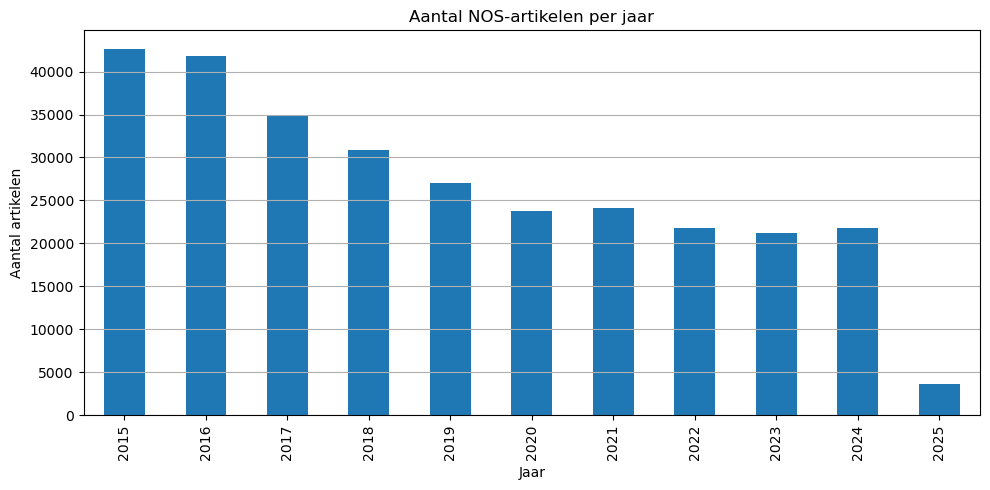

jaar
2015    42667
2016    41781
2017    34818
2018    30877
2019    27034
2020    23736
2021    24064
2022    21756
2023    21155
2024    21816
2025     3622
Name: count, dtype: int64

Totaal aantal artikelen: 293,326


In [36]:
# Zet de publicatiedatum om naar datetime
df['published_time'] = pd.to_datetime(df['published_time'], errors='coerce')

# Extract jaartal en tel per jaar
df['jaar'] = df['published_time'].dt.year
df['jaar'].value_counts().sort_index()

aantal_per_jaar = df['jaar'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
aantal_per_jaar.plot(kind='bar')
plt.title('Aantal NOS-artikelen per jaar')
plt.xlabel('Jaar')
plt.ylabel('Aantal artikelen')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
# Tellen per jaar
aantal_per_jaar = df['jaar'].value_counts().sort_index()

# Print aantallen per jaar
print(aantal_per_jaar)

# Print totaal
print(f"\nTotaal aantal artikelen: {aantal_per_jaar.sum():,}")

 ### Stap 2: Jina embedded bestand laden (uitgevoerd in Collab)

In [22]:
from sentence_transformers import SentenceTransformer

# Laad het model
model = SentenceTransformer("jinaai/jina-embeddings-v3", trust_remote_code=True)

import numpy as np

# Pad naar het bestand
file_path = r"C:\Users\dylan\Downloads\jina_embeddings (1).npy"

# Laad de embeddings
embeddings = np.load(file_path)

# Check de vorm
print(embeddings.shape)




(293, 1024)


###  Stap 3: Clustering toepassen op embeddings

In [ ]:
# Optioneel: upgrade PyTorch als je oude versie hebt
!pip install --upgrade torch torchvision

# Herinstalleer Flash Attention
!pip install flash-attn --no-build-isolation
from sentence_transformers import SentenceTransformer

from sklearn.cluster import KMeans
!pip install umap-learn

  Using cached flash_attn-2.7.4.post1.tar.gz (6.0 MB)


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\dylan\\AppData\\Local\\Temp\\pip-install-rmwp8dal\\flash-attn_43debb00ed2d4321b59070e9c9022322\\csrc/composable_kernel/library/include/ck/library/tensor_operation_instance/gpu/grouped_conv_bwd_weight/device_grouped_conv_bwd_weight_two_stage_xdl_instance.hpp'

c:\Users\dylan\anaconda3\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


   ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
   ------------- -------------------------- 30.7/88.8 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 88.8/88.8 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.9 kB ? eta -:--:--
   ---------------------------------------- 56.9/56.9 kB 3.1 MB/s eta 0:00:00


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\dylan\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



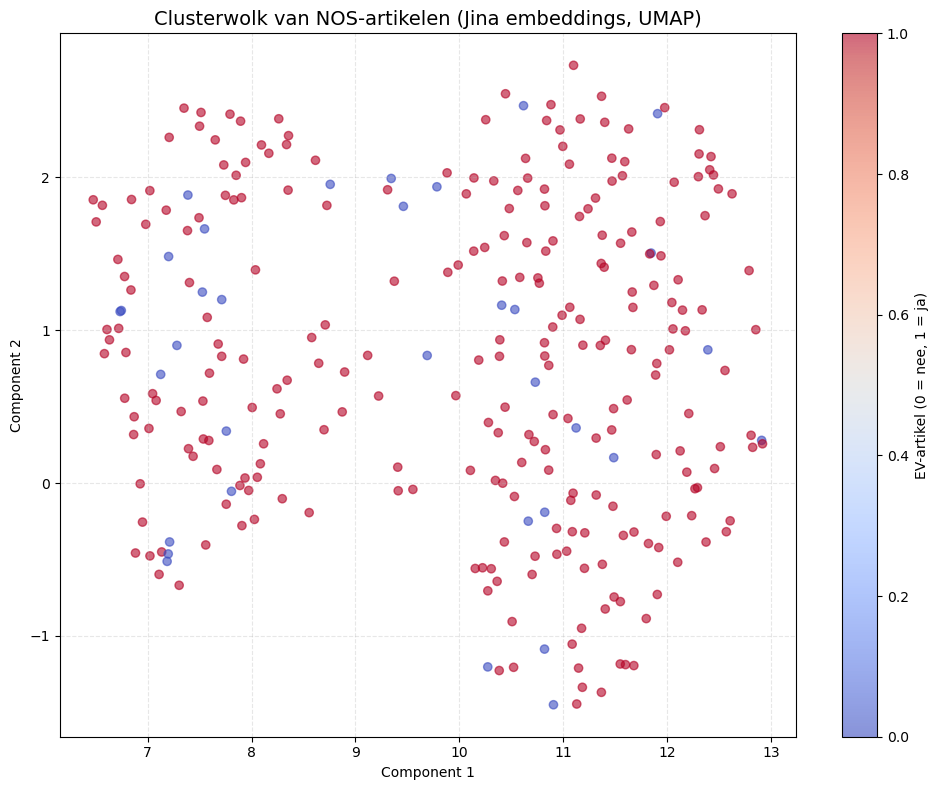

In [28]:

import umap
import matplotlib.pyplot as plt

# Zorg dat je dit installeert als je het nog niet hebt:
# pip install umap-learn

# Reduceer naar 2D
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(artikel_embeddings)

# Voeg 2D-coördinaten toe aan je DataFrame
df_sample["x"] = embedding_2d[:, 0]
df_sample["y"] = embedding_2d[:, 1]

# Plot met kleuring op basis van of het een EV-artikel is
plt.figure(figsize=(10, 8))
plt.scatter(
    df_sample["x"],
    df_sample["y"],
    c=df_sample["is_ev_final"].astype(int),
    cmap="coolwarm",
    alpha=0.6
)
plt.title("Clusterwolk van NOS-artikelen (Jina embeddings, UMAP)", fontsize=14)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True, linestyle="--", alpha=0.3)
plt.colorbar(label="EV-artikel (0 = nee, 1 = ja)")
plt.tight_layout()
plt.show()


Rood (1) = herkend als EV-gerelateerd artikel (is_ev_final = True)

Blauw (0) = geen EV-artikel volgens jouw semantische of keyword-filter

In [29]:
display(df_sample)

,channel,url,type,title,keywords,section,description,published_time,modified_time,image,...,is_ev_semantisch,is_ev_keyword,is_ev_final,sentiment_label,sentiment_score,sentiment_category,date,month,x,y
0,nos,https://nos.nl/artikel/2218677-uitgesproken-om...,article,"Uitgesproken, omstreden en vandaag (deels) vri...",Jo Palmen,Binnenland,De kwestie rond de Brunssumse politicus begint...,2018-02-21 19:10:02,2018-02-21 19:44:05,https://cdn.nos.nl/image/2018/02/21/453817/120...,...,False,True,True,negatief,-0.999994,Zeer negatief,2018-02-21 19:10:02,2018-02,10.768126,1.307779
1,nos,https://nos.nl/artikel/2079353-utrecht-breidt-...,article,Utrecht breidt vluchtelingenopvang uit,"PCB, azc",Binnenland,Er komen verspreid in de stad extra opvangloca...,2016-01-08 16:46:23,2016-01-08 16:46:23,https://cdn.nos.nl/image/2014/11/20/27043/1200...,...,False,True,True,negatief,-0.999996,Zeer negatief,2016-01-08 16:46:23,2016-01,11.668189,1.149190
2,nos,https://nos.nl/artikel/2041755-tsipras-haalt-u...,article,Tsipras haalt uit naar schuldeisers,None,Buitenland,Zij zouden erop uit zijn om niet alleen zijn r...,2015-06-16 17:09:57,2015-06-16 17:09:57,https://cdn.nos.nl/image/2015/06/16/167314/120...,...,False,True,True,negatief,-0.999969,Zeer negatief,2015-06-16 17:09:57,2015-06,12.819712,0.233955
3,nos,https://nos.nl/artikel/2019577-spektakel-in-al...,article,Spektakel in All-Star Game met Westbrook als MVP,"Russell Westbrook, Basketbal",Basketbal,De NBA-sterren van het westen verslaan de ster...,2015-02-16 07:15:05,2015-02-16 07:15:05,https://cdn.nos.nl/image/2015/02/16/132849/120...,...,False,True,True,negatief,-0.999997,Zeer negatief,2015-02-16 07:15:05,2015-02,7.713240,0.829228
4,nos,https://nos.nl/artikel/2253443-oppositie-slijp...,article,Oppositie slijpt de messen over dividendbelast...,Tweede Kamer,"Politiek, Economie",De discussie over de afschaffing laait opnieuw...,2018-10-05 09:23:39,2018-10-05 14:00:21,https://cdn.nos.nl/image/2018/08/30/496565/120...,...,False,True,True,negatief,-0.999981,Zeer negatief,2018-10-05 09:23:39,2018-10,12.490316,1.924503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,nos,https://nos.nl/artikel/2119363-andere-tijden-s...,article,"Andere Tijden Sport: staatsdoping, verraad en ...","Andere Tijden Sport [programma], Edith Brigitha",Zwemmen,Andere Tijden Sport zendt vanavond de document...,2016-07-24 11:07:11,2016-07-24 22:58:29,https://cdn.nos.nl/image/2016/07/24/302425/120...,...,False,True,True,negatief,-0.999585,Zeer negatief,2016-07-24 11:07:11,2016-07,8.709228,1.034917
289,nos,https://nos.nl/artikel/2134333-zegereeks-feyen...,article,'Zegereeks Feyenoord niet te vergelijken met d...,"Feyenoord [voetbalclub], Hooijdonk, Pierre van...",Voetbal,Pierre van Hooijdonk vergelijkt de twee teams ...,2016-09-25 13:44:10,2016-09-25 13:46:26,https://cdn.nos.nl/image/2016/09/25/320534/120...,...,False,True,True,negatief,-0.988995,Zeer negatief,2016-09-25 13:44:10,2016-09,7.793127,2.413350
290,nos,https://nos.nl/artikel/2379760-ggd-komt-nog-du...,article,GGD komt nog duizenden werknemers tekort voor ...,"vaccinatie, prikken, corona",Binnenland,"Van de 13.000 fte, zo'n 30.000 banen, die vana...",2021-05-07 16:29:08,2021-05-07 16:29:08,https://cdn.nos.nl/image/2021/05/07/740101/102...,...,False,True,True,negatief,-0.997193,Zeer negatief,2021-05-07 16:29:08,2021-05,12.333743,1.133237
291,nos,https://nos.nl/artikel/2169251-hoge-leidinggev...,article,Hoge leidinggevende OM verdacht van ontucht me...,"OM, Openbaar Ministerie",Binnenland,Het gaat om de tweede man van het functioneel ...,2017-04-20 15:44:39,2017-04-20 20:03:47,https://cdn.nos.nl/image/2016/03/16/265416/120...,...,False,True,True,negatief,-0.999902,Zeer negatief,2017-04-20 15:44:39,2017-04,10.065824,1.892100


In [23]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

df_sample = df.sample(frac=0.1, random_state=42).reset_index(drop=True)


# Step 1: Define multiple search phrases (specific and broad)
zoekzinnen = [
    "Artikel over elektrische auto's of laadpalen.",
    "Nieuws over accutechnologie, stekkervoertuigen of EV-beleid.",
    "EV, elektrische auto, laadpaal, Tesla, batterij — dit artikel gaat hierover."
]

# Step 2: Encode all search phrases into embeddings
query_embeddings = model.encode(
    zoekzinnen,
    prompt_name="retrieval.query",
    normalize_embeddings=True
)

# Step 3: Normalize article embeddings
artikel_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

# Step 4: Compute cosine similarity between queries and articles
scores_matrix = cosine_similarity(query_embeddings, artikel_embeddings)

# Step 5: Extract the highest similarity score for each article
max_scores = scores_matrix.max(axis=0)

# Step 6: Add similarity scores to the DataFrame
df_sample = df.sample(frac=0.001, random_state=42).reset_index(drop=True)

df_sample['ev_score'] = max_scores
df_sample['is_ev_semantisch'] = df_sample['ev_score'] > 0.5  # Experiment with this threshold

# Step 7: (Optional) Add keyword-based fallback
df_sample['is_ev_keyword'] = df_sample['content'].str.contains(
    "elektrische auto|laadpaal|accu|EV|Tesla|opladen|emissievrij", case=False, na=False
)

# Step 8: Combine semantic and keyword-based results
df_sample['is_ev_final'] = df_sample['is_ev_semantisch'] | df_sample['is_ev_keyword']

# Step 9: Inspect the results
df_sample[['content', 'ev_score', 'is_ev_semantisch', 'is_ev_keyword', 'is_ev_final']].sort_values(by='ev_score', ascending=False)



,content,ev_score,is_ev_semantisch,is_ev_keyword,is_ev_final
116,<h1>Inval bij kantoren Imtech in Duitsland</h1...,0.515985,True,True,True
276,"<h1>Veel nieuwe motorrijders in 2019, 'doorbra...",0.503322,True,False,True
160,<h1>Extinction Rebellion wil inzet waterkanon ...,0.453411,False,True,True
7,<h1>Google opent eerste fysieke winkel in Lond...,0.450145,False,True,True
104,<h1>Welshman wil vuilnisbelt opkopen op zoek n...,0.444617,False,False,False
...,...,...,...,...,...
70,<h1>Weer studentencafés Nijmegen dicht wegens ...,0.233395,False,True,True
114,<h1>Champions League ver weg voor Liverpool</h...,0.229286,False,True,True
194,<h1>Doelman Stekelenburg zet punt achter inter...,0.221744,False,False,False
91,<h1>'Dit nog nooit meegemaakt bij RKC'</h1><p>...,0.213119,False,True,True


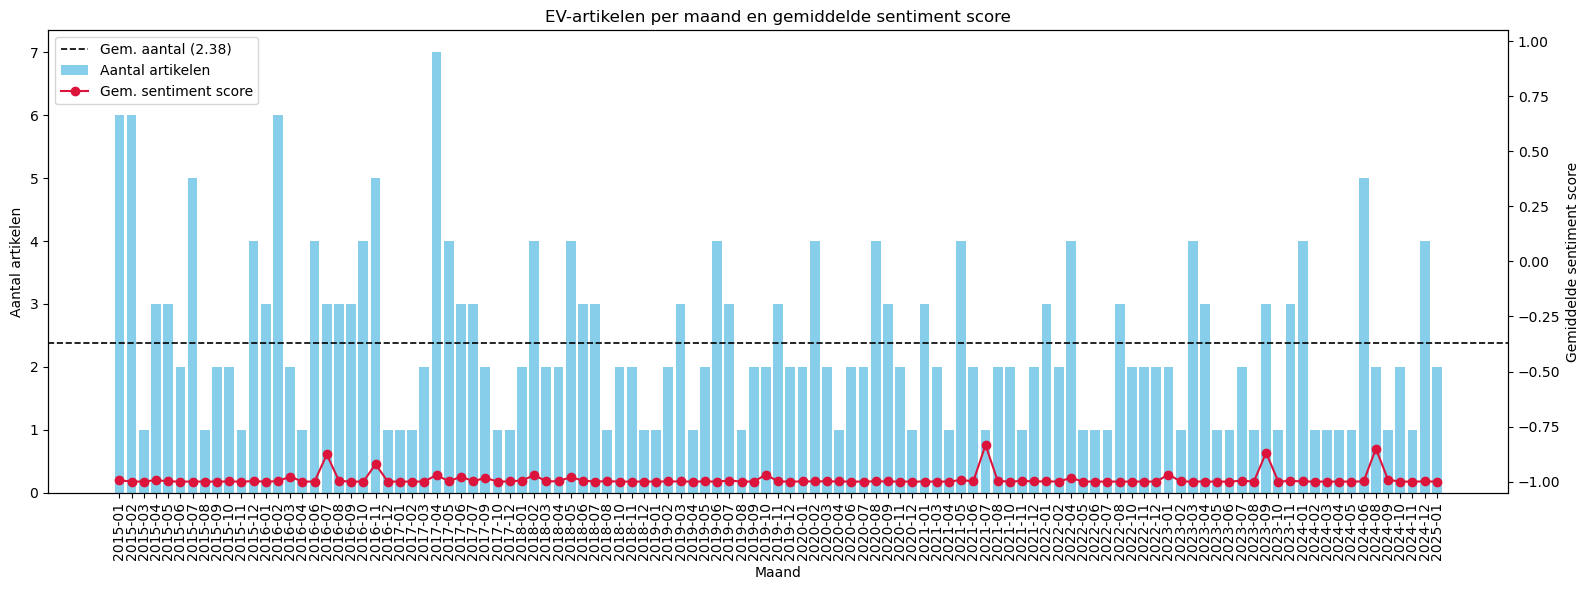

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Zorg dat published_time een datetime is
df_sample["published_time"] = pd.to_datetime(df_sample["published_time"], errors="coerce")

# Filter alleen EV-artikelen
df_ev = df_sample[df_sample["is_ev_final"] == True].copy()

# Zorg dat sentiment_score numeriek is (voor de zekerheid)
df_ev["sentiment_score"] = pd.to_numeric(df_ev["sentiment_score"], errors="coerce")

# Voeg maand toe
df_ev["month"] = df_ev["published_time"].dt.to_period("M").astype(str)

# 📊 Aantal artikelen per maand
ev_per_month = df_ev.groupby("month").size()

# 📈 Gemiddelde sentiment score per maand
sentiment_per_month = df_ev.groupby("month")["sentiment_score"].mean()

# 🔢 Gemiddeld aantal artikelen voor referentielijn
avg_month_count = ev_per_month.mean()

# 📉 Plot beide op gedeelde x-as, dubbele y-as
fig, ax1 = plt.subplots(figsize=(16, 6))

# Barplot voor aantal artikelen
bars = ax1.bar(ev_per_month.index, ev_per_month.values, color="skyblue", label="Aantal artikelen")
ax1.axhline(avg_month_count, linestyle="--", color="black", linewidth=1.2, label=f"Gem. aantal ({avg_month_count:.2f})")
ax1.set_ylabel("Aantal artikelen")
ax1.set_xlabel("Maand")
ax1.tick_params(axis='x', rotation=90)

# Tweede as voor sentiment score
ax2 = ax1.twinx()
ax2.plot(sentiment_per_month.index, sentiment_per_month.values, color="crimson", marker='o', label="Gem. sentiment score")
ax2.set_ylabel("Gemiddelde sentiment score")
ax2.set_ylim(-1.05, 1.05)

# Legenda combineren
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title("EV-artikelen per maand en gemiddelde sentiment score")
plt.tight_layout()
plt.show()


In [30]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch

# Laad het model
model_name = "wietsedv/bert-base-dutch-cased-finetuned-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)


teksten = (
    df_sample[df_sample['is_ev_final'] == True]['title'].fillna('') + ". " +
    df_sample[df_sample['is_ev_final'] == True]['description'].fillna('') + ". " +
    df_sample[df_sample['is_ev_final'] == True]['content'].fillna('')
).str.slice(0, 512).tolist()



# Voer sentimentanalyse uit
sentimenten = sentiment_pipeline(teksten, truncation=True)

# Zet resultaten om naar scores en labels
labels = []
scores = []
for s in sentimenten:
    lbl = s["label"]
    score = s["score"]
    if lbl == "LABEL_2":     # positief
        labels.append("positief")
        scores.append(score)
    elif lbl == "LABEL_1":   # neutraal
        labels.append("neutraal")
        scores.append(0)
    else:                    # negatief
        labels.append("negatief")
        scores.append(-score)

# Voeg toe aan df_sample op juiste rijen
ev_indices = df_sample[df_sample['is_ev_final'] == True].index
df_sample.loc[ev_indices, "sentiment_label"] = labels
df_sample.loc[ev_indices, "sentiment_score"] = scores

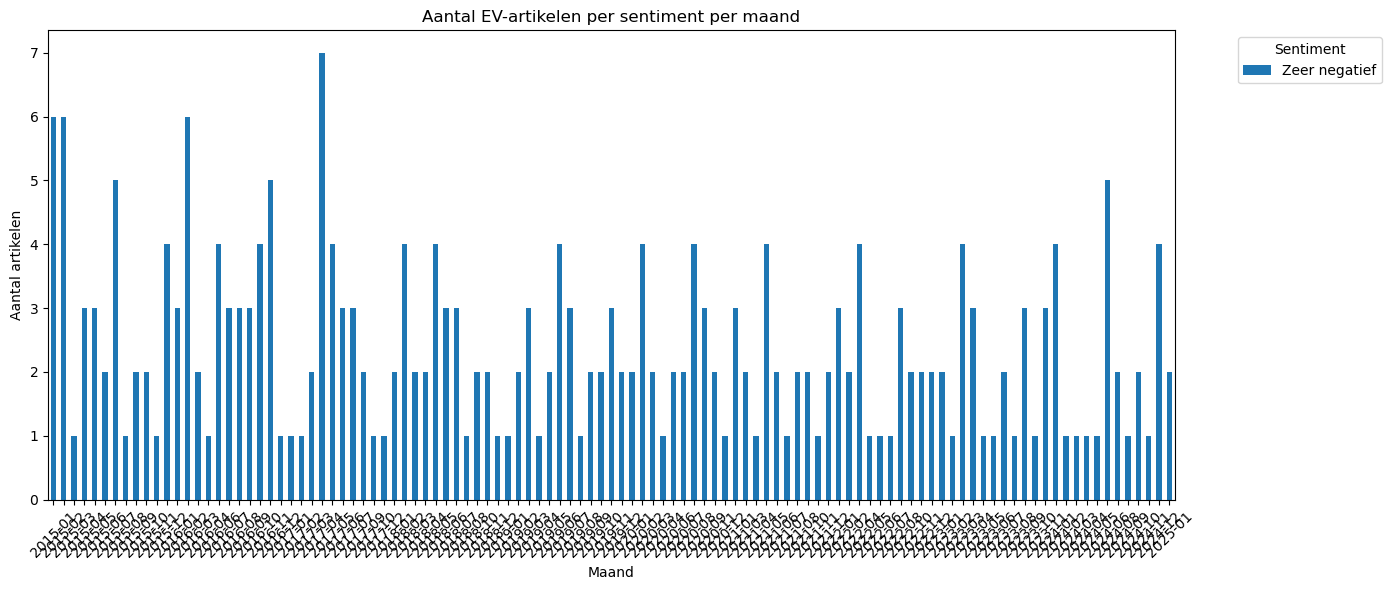

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# 1. Sentimentcategorie toevoegen
def label_sentiment(score):
    if pd.isna(score):
        return "Onbekend"
    elif score <= -0.3:
        return "Zeer negatief"
    elif score <= -0.1:
        return "Negatief"
    elif score <= 0.1:
        return "Neutraal"
    elif score <= 0.3:
        return "Positief"
    else:
        return "Zeer positief"

df_sample["sentiment_category"] = df_sample["sentiment_score"].apply(label_sentiment)

# 2. Zorg dat 'date' een datetime is en haal maand eruit
# Gebruik juiste kolom om naar datetime om te zetten
df_sample["date"] = pd.to_datetime(df_sample["published_time"], errors="coerce")
df_sample["month"] = df_sample["date"].dt.to_period("M").astype(str)


# 3. Filter alleen EV-artikelen
df_ev = df_sample[df_sample["is_ev_final"] == True].copy()

# 4. Aantal artikelen per maand per sentiment
sentiment_counts = df_ev.groupby(["month", "sentiment_category"]).size().unstack(fill_value=0)
sentiment_counts = sentiment_counts.sort_index()

# 5. Barplot (matplotlib)
sentiment_counts.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title("Aantal EV-artikelen per sentiment per maand")
plt.xlabel("Maand")
plt.ylabel("Aantal artikelen")
plt.xticks(rotation=45)
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 6. Interactieve tabel (plotly)
fig = go.Figure(data=[go.Table(
    header=dict(values=["Maand"] + list(sentiment_counts.columns)),
    cells=dict(values=[sentiment_counts.index] + [sentiment_counts[col] for col in sentiment_counts.columns]))
])
fig.update_layout(title="Tabel: aantal EV-artikelen per sentiment per maand")
fig.show()


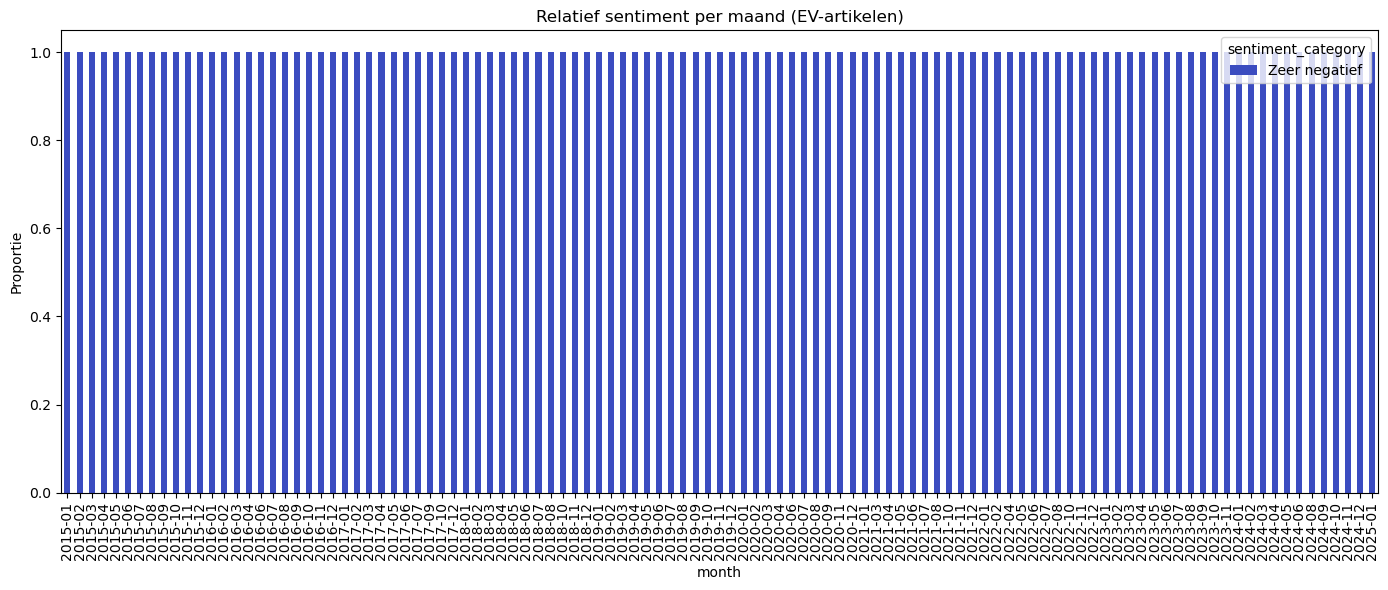

In [26]:
sentiment_percentages = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0)
sentiment_percentages.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='coolwarm')
plt.title("Relatief sentiment per maand (EV-artikelen)")
plt.ylabel("Proportie")
plt.tight_layout()
plt.show()


In [18]:
from sklearn.cluster import KMeans

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(embeddings)


c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



ValueError: Length of values (293) does not match length of index (293326)

### Stap 4: EV-artikelen identificeren via sleutelwoorden

### Stap 5: Opslaan geclustered data

In [ ]:
import pandas as pd

# Feather-bestand inlezen
df = pd.read_feather(r"C:\Users\dylan\Trying hard\NOS_NL_articles_2015_feb_2025.feather")

# Opslaan als CSV-bestand
df.to_csv(r"D:\Thesis\GIT\Datasets\NOS_NL_articles_2015_feb_2025.csv", index=False)

print("✅ Bestand succesvol opgeslagen als CSV")


✅ Bestand succesvol opgeslagen als CSV


In [ ]:
import os
import subprocess

folder = os.path.dirname(csv_path)
subprocess.run(f'explorer "{folder}"')


CompletedProcess(args='explorer "D:\\Thesis\\GIT\\Datasets"', returncode=1)